## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [4]:
import pandas as pd
import warnings

loans = pd.read_csv("LoanStatus.csv")
warnings.filterwarnings("ignore")

In [13]:
loans

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [33]:
print('Loan amount median is:  ',loans['LoanAmount'].median())
print('Mean of The term of the loan amount:  ',loans['Loan_Amount_Term'].mean())
print('The moe of the application income per month:  ',loans['ApplicantIncome'].mode())
print('STD of credit_history:  ', loans['Credit_History'].std())
print('Minimum loan amount :  ',loans['LoanAmount'].min())
print('Minimum loan amount :  ',loans['LoanAmount'].max())



Loan amount median is:   128.0
Mean of The term of the loan amount:   342.0
The moe of the application income per month:   0    2500
Name: ApplicantIncome, dtype: int64
STD of credit_history:   0.3648783192364048
Minimum loan amount :   9.0
Minimum loan amount :   700.0


In [12]:
loans.isnull().sum()

Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [16]:

status_counts = loans['Loan_Status'].value_counts()
total_loans = len(loans)
probability = status_counts['Y']/ total_loans

print("Probability of getting a loan:", probability)


Probability of getting a loan: 0.6872964169381107


In [20]:
credit_hist = loans[loans['Credit_History'] == 1]        #first filter approved loans with good credit histroy
credit_hist_apr = credit_hist[credit_hist['Loan_Status'] == 'Y']    #calculating probability

credit_probability = len(credit_hist_apr)/ len(credit_hist) 

print(credit_probability)

print("Probability of getting a loan with good credit history:", credit_probability)

0.7957894736842105
Probability of getting a loan with good credit history: 0.7957894736842105


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები 


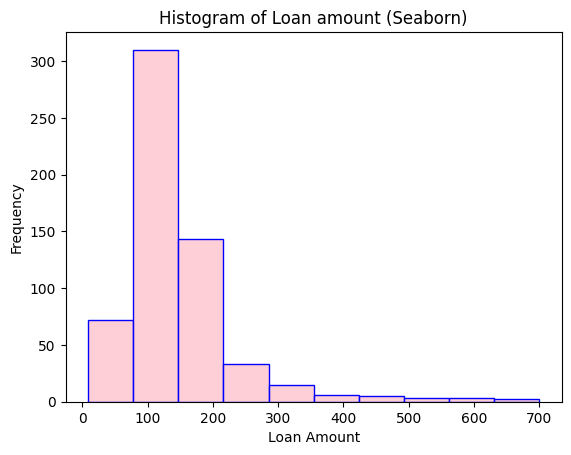

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

#This is the historgram of the loan amount with 10 bins.
sns.histplot(data=loans, x='LoanAmount', bins=10,color='pink',edgecolor='blue')
plt.title('Histogram of Loan amount (Seaborn)')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()



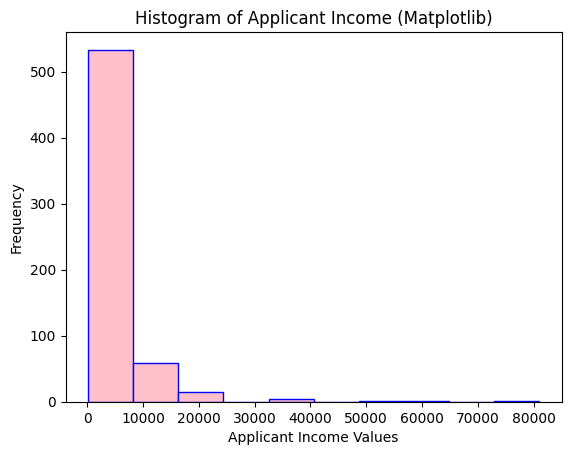

In [37]:
plt.hist(loans['ApplicantIncome'], bins=10, color='pink', edgecolor='blue') 
plt.title('Histogram of Applicant Income (Matplotlib)')  
plt.xlabel('Applicant Income Values') 
plt.ylabel('Frequency') 
plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [38]:
from scipy.stats import norm

In [39]:

x = 2000  
mean_val = loans['ApplicantIncome'].mean()
std_dev_val = loans['ApplicantIncome'].std() 

cumulative_probability = norm.cdf(x, mean_val, std_dev_val)
result = cumulative_probability * 100


print(f"The cumulative probability that a customer has an income less than 2,000 EUR per month is: {result:.2f}%")


The cumulative probability that a customer has an income less than 2,000 EUR per month is: 28.87%


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

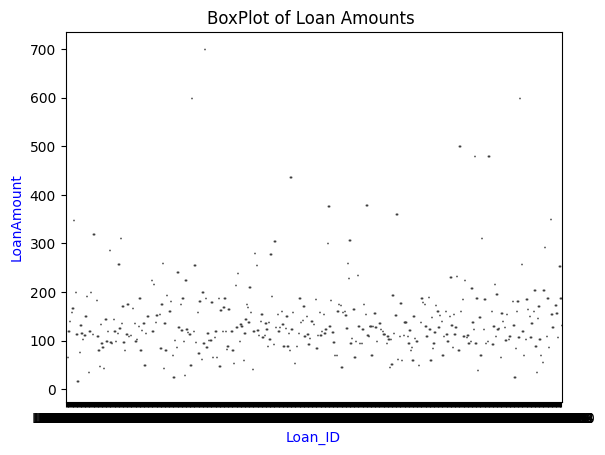

In [52]:
sns.boxplot(x='Loan_ID', y='LoanAmount', data=loans)
plt.title('BoxPlot of Loan Amounts ')
plt.xlabel('Loan_ID',color='blue')
plt.ylabel('LoanAmount',color='blue')
plt.show()

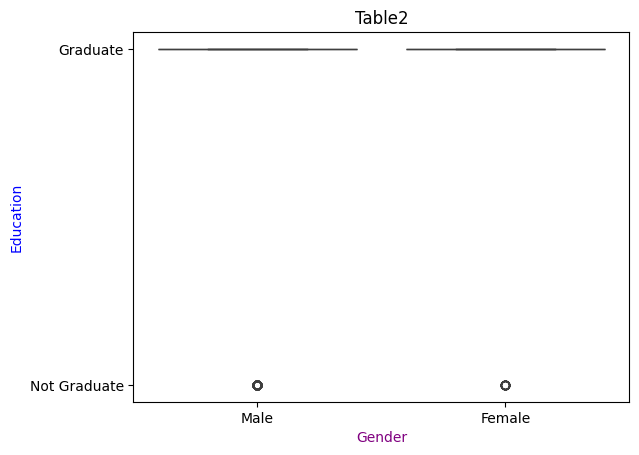

In [53]:
sns.boxplot(x='Gender', y='Education', data=loans)
plt.title('Table2')
plt.xlabel('Gender',color='purple')
plt.ylabel('Education',color ='blue')
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [55]:
from scipy.stats import ttest_1samp,ttest_ind


selected_column = 'ApplicantIncome'
specified_value = 100 

t_statistic, p_value = ttest_1samp(loans[selected_column], specified_value)

alpha = 0.05 
if p_value < alpha:
    print(f"We can say that the mean of '{selected_column}' is not equal to {specified_value}.")
else:
    print(f"There is not enough information to say that the mean of '{selected_column}' is different from {specified_value}.")

We can say that the mean of 'ApplicantIncome' is not equal to 100.


In [56]:
column1 = 'ApplicantIncome'
column2 = 'LoanAmount'

t_statistic, p_value = ttest_ind(loans[column1], loans[column2])


alpha = 0.05
if p_value < alpha:
    print(f"There is enough information to say that the means of '{column1}' and '{column2}' are not equal.")
else:
    print(f"There is not enough information to say that the means of '{column1}' and '{column2}' are different.")

There is not enough information to say that the means of 'ApplicantIncome' and 'LoanAmount' are different.
